<a href="https://colab.research.google.com/github/KMInada/DSWP/blob/Exercicios/LabData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

drive.mount('/content/drive')
df_LabData = pd.read_csv('/content/drive/My Drive/Data_Science/train4.csv', index_col = 0)
df_LabData.head()
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 10,
    'display.precision': 2,
    'display.show_dimensions': True
                  }

for op, value in d_configuracao.items():
    pd.set_option(op, value)
    print(op, value)

sns.set_theme(style = 'white')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,0,0,0,0,56,0,0,1,1,1,1,1,0,0,2,0,0,45.05,2560.10,0
6731,1,0,1,1,17,1,0,0,0,0,0,0,0,0,1,0,1,19.65,332.65,0
6479,0,0,1,0,60,1,1,2,0,1,1,1,1,1,2,1,3,110.80,6640.70,0
6861,0,0,0,0,37,1,1,2,0,1,1,0,1,1,0,1,4,101.90,3545.35,1
3266,1,0,1,1,29,1,0,2,0,0,0,0,0,0,0,1,2,70.75,1974.80,1


In [9]:
df_LabData.columns = [c.lower() for c in df_LabData.columns]
df_LabData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
id,,,,,,,,,,,,,,,,,,,,
4030,0,0,0,0,56,0,0,1,1,1,1,1,0,0,2,0,0,45.05,2560.10,0
6731,1,0,1,1,17,1,0,0,0,0,0,0,0,0,1,0,1,19.65,332.65,0
6479,0,0,1,0,60,1,1,2,0,1,1,1,1,1,2,1,3,110.80,6640.70,0
6861,0,0,0,0,37,1,1,2,0,1,1,0,1,1,0,1,4,101.90,3545.35,1
3266,1,0,1,1,29,1,0,2,0,0,0,0,0,0,0,1,2,70.75,1974.80,1


In [10]:
df_LabData.dtypes

gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice       int64
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [11]:
df_X = df_LabData.drop(columns = ['churn'], axis = 1)
df_y = df_LabData['churn']
df_y.head()

id
4030    0
6731    0
6479    0
6861    1
3266    1
Name: churn, dtype: int64

In [12]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = 0.2)

In [13]:
X2_treinamento = sm.add_constant(X_treinamento)
lm_sm = sm.OLS(y_treinamento, X2_treinamento).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     93.10
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          8.78e-306
Time:                        18:53:06   Log-Likelihood:                -1979.5
No. Observations:                4507   AIC:                             3999.
Df Residuals:                    4487   BIC:                             4127.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2013      0.029  

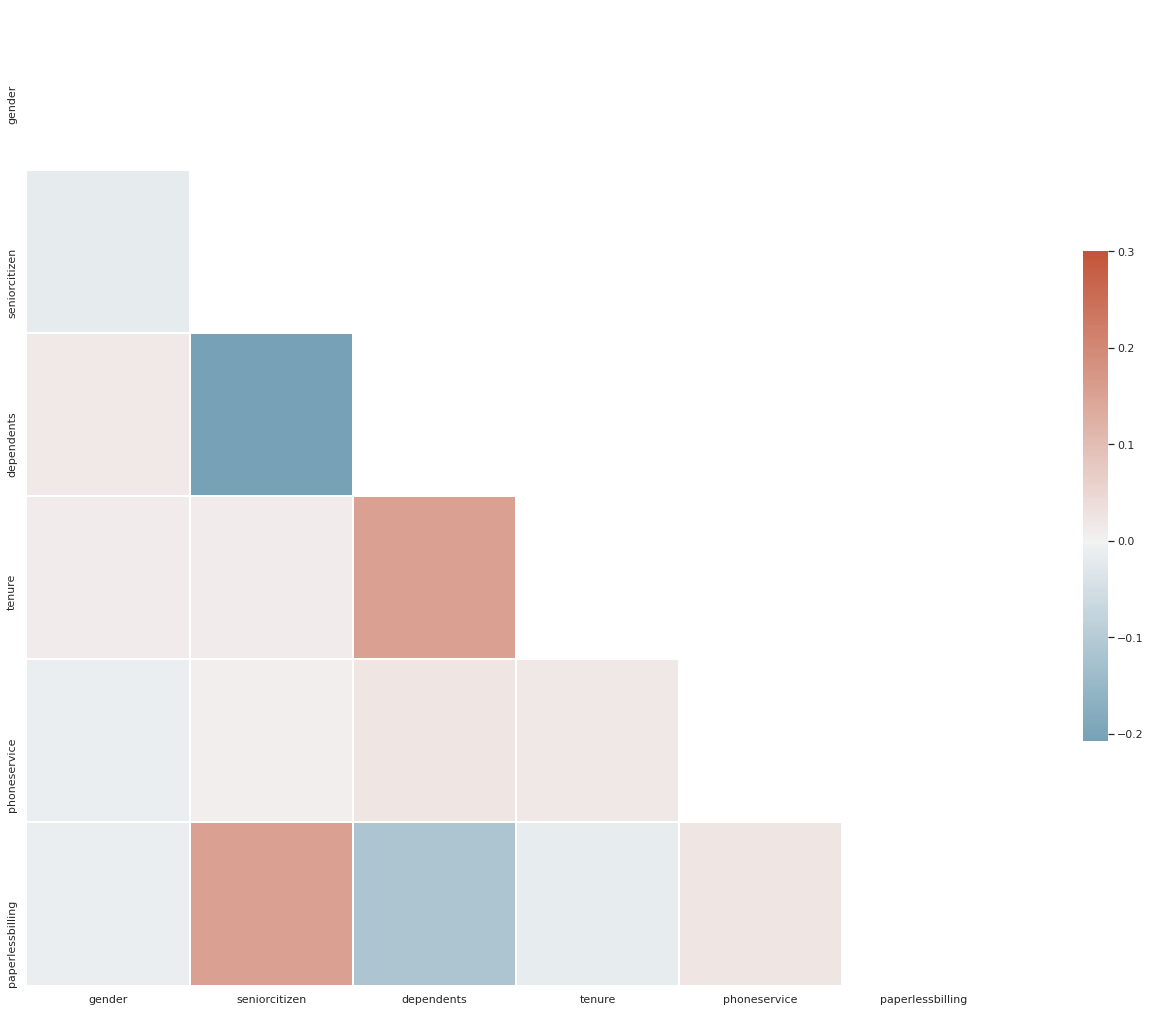

In [61]:
x3_treinamento = X_treinamento.drop(columns = ['parter'], axis = 1)
corr = x8_treinamento.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize = (28,18))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths=.5, cbar_kws={'shrink' : .5})

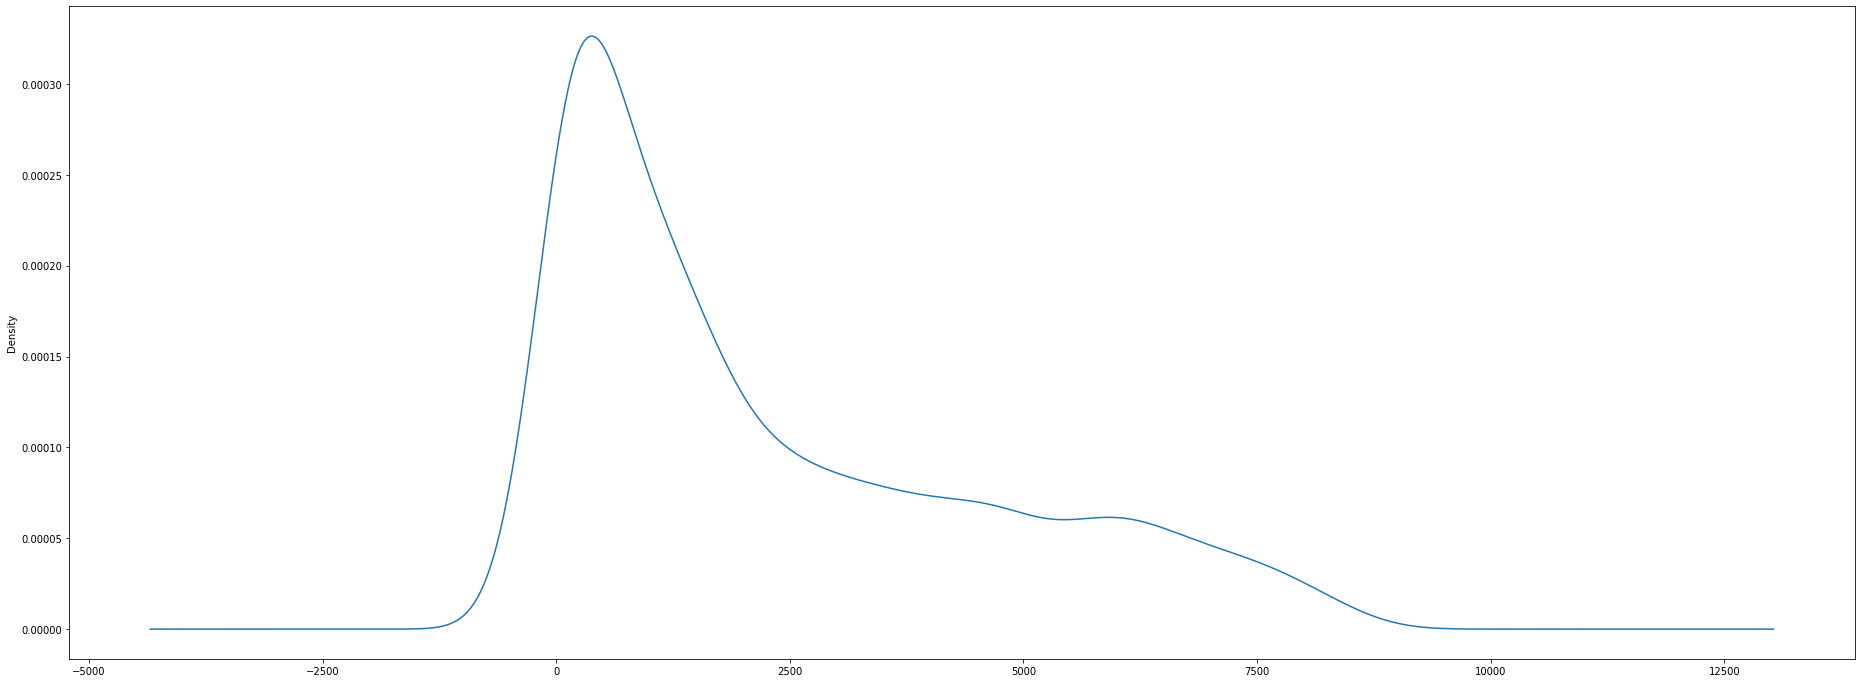

In [36]:
X_treinamento['totalcharges'].plot(kind = 'kde', figsize = (32,12))